  race/ethnicity  math score  reading score
0        group B          72             72
1        group C          69             90
2        group B          90             95
3        group A          47             57
4        group C          76             78
race/ethnicity    0
math score        0
reading score     0
dtype: int64


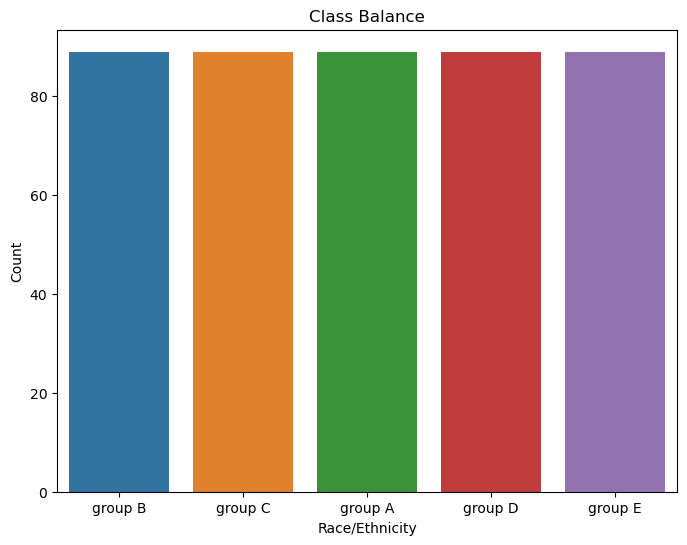

Матрица ошибок для логистической регрессии:
 [[ 5  0  2  2  2]
 [10  0  8  3  3]
 [ 4  0  5  2  2]
 [ 4  0  5  1  5]
 [10  0  4  1 11]]
Метрики классификации для логистической регрессии:
               precision    recall  f1-score   support

     group A       0.15      0.45      0.23        11
     group B       0.00      0.00      0.00        24
     group C       0.21      0.38      0.27        13
     group D       0.11      0.07      0.08        15
     group E       0.48      0.42      0.45        26

    accuracy                           0.25        89
   macro avg       0.19      0.27      0.21        89
weighted avg       0.21      0.25      0.21        89

Матрица ошибок для SVM:
 [[ 5  0  5  0  1]
 [11  0 10  0  3]
 [ 4  0  7  0  2]
 [ 2  0 10  0  3]
 [ 8  0  9  0  9]]
Метрики классификации для SVM:
               precision    recall  f1-score   support

     group A       0.17      0.45      0.24        11
     group B       0.00      0.00      0.00        24
     group C

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv("StudentsPerformance.csv", 
                   usecols=["race/ethnicity", "math score", "reading score"])
print(data.head())
print(data.isnull().sum())
# Создание нового DataFrame для балансировки
balanced_data = pd.DataFrame(columns=data.columns)

# Определение минимального количества записей в группе "race/ethnicity"
min_count = data["race/ethnicity"].value_counts().min()

# Балансировка данных
for group in data["race/ethnicity"].unique():
    group_data = data[data["race/ethnicity"] == group].sample(n=min_count, random_state=42)
    balanced_data = pd.concat([balanced_data, group_data])

# Обновление данных
data = balanced_data.copy()

plt.figure(figsize=(8, 6))
sns.countplot(x="race/ethnicity", data=data)
plt.title("Class Balance")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")
plt.show()

# Отделим признаки от целевой переменной
X = data[['math score', 'reading score']]
y = data['race/ethnicity']

# Разделим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логистическая регрессия, прогноз на тестовых данных, матрица ошибок
lr = LogisticRegression(random_state=271)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)

# SVM, прогноз на тестовых данных, матрица ошибок
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)

# KNN, прогноз на тестовых данных, матрица ошибок
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)

lr_report = classification_report(y_test, lr_pred)
svm_report = classification_report(y_test, svm_pred)
knn_report = classification_report(y_test, knn_pred)

print("Матрица ошибок для логистической регрессии:\n", lr_cm)
print("Метрики классификации для логистической регрессии:\n", lr_report)
print("Матрица ошибок для SVM:\n", svm_cm)
print("Метрики классификации для SVM:\n", svm_report)
print("Матрица ошибок для KNN:\n", knn_cm)
print("Метрики классификации для KNN:\n", knn_report)
